# 朴素贝叶斯模型
专门解决分类问题的有监督学习的模型
## 高斯贝叶斯分类器的应用
要求输入的数据集X为连续的数值型变量

In [1]:
# 导入第三方包
import pandas as pd
%config ZMQInteractiveShell.ast_node_interactivity='all'   # nootbook使用

变量y中，1表示人类皮肤，2表示非人类皮肤，将因变量为1的值设置为正例，因变量为2的值设置为负例。

In [3]:
# 读入数据
skin = pd.read_excel(r'Skin_Segment.xlsx')
skin.head()
# 设置正例和负例
skin.y = skin.y.map({2:0,1:1})
skin.y.value_counts()

,B,G,R,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


0    194198
1     50859
Name: y, dtype: int64

非人类皮肤0的样本量为194198，因变量为0和1的比例为3.8:1

In [7]:
# 导入第三方模块
from sklearn import model_selection
# 样本拆分
X_train,X_test,y_train,y_test = model_selection.train_test_split(skin.iloc[:,:3], 
                                                                 skin.y, 
                                                                 test_size = 0.25, 
                                                                 random_state=1234)

In [8]:
# 导入第三方模块
from sklearn import naive_bayes

# 调用高斯朴素贝叶斯分类器的“类”
gnb = naive_bayes.GaussianNB()
# 模型拟合
gnb.fit(X_train, y_train)
# 模型在测试数据集上的预测
gnb_pred = gnb.predict(X_test)
# 各类别的预测数量
pd.Series(gnb_pred).value_counts()

GaussianNB(priors=None, var_smoothing=1e-09)

0    50630
1    10635
dtype: int64

Text(0.5, 15.0, 'Real')

Text(33.0, 0.5, 'Predict')

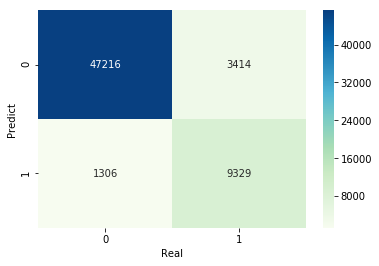

模型的准确率为：
 0.9229576430261976
模型的评估报告：
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     48522
           1       0.88      0.73      0.80     12743

   micro avg       0.92      0.92      0.92     61265
   macro avg       0.90      0.85      0.88     61265
weighted avg       0.92      0.92      0.92     61265



In [11]:
# 导入第三方包
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# 构建混淆矩阵
cm = pd.crosstab(gnb_pred,y_test)
# 绘制混淆矩阵图
sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = 'd')
# 去除x轴和y轴标签
plt.xlabel('Real')
plt.ylabel('Predict')
# 显示图形
plt.show()

print('模型的准确率为：\n',metrics.accuracy_score(y_test, gnb_pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, gnb_pred))

模型测试准确率为0.92，模型的预测效果还可以。

Text(0.5, 0.3, 'ROC curve (area = 0.94)')

Text(0.5, 0, '1-Specificity')

Text(0, 0.5, 'Sensitivity')

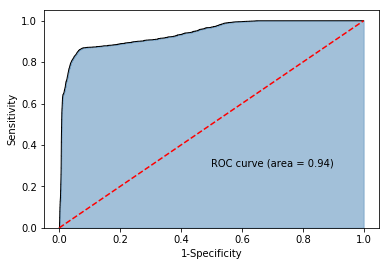

In [12]:
# 计算正例的预测概率，用于生成ROC曲线的数据
y_score = gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

## 多项式贝叶斯分类器
数据集的自变量X均为离散型变量

In [16]:
# 导入第三方包
import pandas as pd
# 读取数据
mushrooms = pd.read_csv(r'mushrooms.csv')
# 数据的前5行
mushrooms.head()
mushrooms.info()
# 因变量为type，表示蘑菇是否有毒

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
type                        8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_color                  8124 non-null object
ring_number                 8124 non-null object
ring_type  

表中的所有变量均为字符型的离散值，由于python建模过程中必须要求自变量为数值型，因此需要对这些变量做因子化处理，即把字符值转换为对应的数值，利用python中的factorize函数对离散的自变量进行数值转换。

In [17]:
# 将字符型数据作因子化处理，将其转换为整数型数据
columns = mushrooms.columns[1:]
for column in columns:
    mushrooms[column] = pd.factorize(mushrooms[column])[0]
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,edible,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,edible,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,poisonous,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,edible,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [18]:
from sklearn import model_selection
# 将数据集拆分为训练集合测试集
Predictors = mushrooms.columns[1:]
X_train,X_test,y_train,y_test = model_selection.train_test_split(mushrooms[Predictors], 
                                                                 mushrooms['type'], 
                                                                 test_size = 0.25, 
                                                                 random_state = 10)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Text(0.5, 15.0, 'Real')

Text(33.0, 0.5, 'Predict')

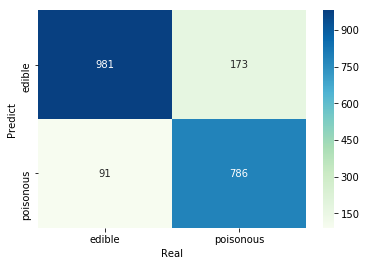

模型的准确率为：
 0.8700147710487445
模型的评估报告：
               precision    recall  f1-score   support

      edible       0.85      0.92      0.88      1072
   poisonous       0.90      0.82      0.86       959

   micro avg       0.87      0.87      0.87      2031
   macro avg       0.87      0.87      0.87      2031
weighted avg       0.87      0.87      0.87      2031



In [19]:
from sklearn import naive_bayes
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
# 构建多项式贝叶斯分类器的“类”
mnb = naive_bayes.MultinomialNB()
# 基于训练数据集的拟合
mnb.fit(X_train, y_train)
# 基于测试数据集的预测
mnb_pred = mnb.predict(X_test)
# 构建混淆矩阵
cm = pd.crosstab(mnb_pred,y_test)
# 绘制混淆矩阵图
sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = 'd')
# 去除x轴和y轴标签
plt.xlabel('Real')
plt.ylabel('Predict')
# 显示图形
plt.show()

# 模型的预测准确率
print('模型的准确率为：\n',metrics.accuracy_score(y_test, mnb_pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, mnb_pred))

Text(0.5, 0.3, 'ROC curve (area = 0.94)')

Text(0.5, 0, '1-Specificity')

Text(0, 0.5, 'Sensitivity')

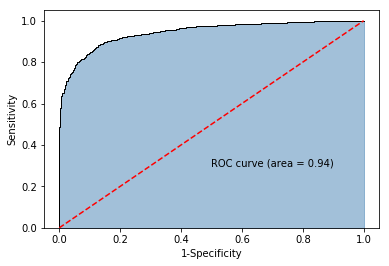

In [20]:
from sklearn import metrics
# 计算正例的预测概率，用于生成ROC曲线的数据
y_score = mnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test.map({'edible':0,'poisonous':1}), y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

## 伯努利贝叶斯分类器
数据集的自变量X均为0-1二元值(假设变量的条件概率服从伯努利分布)

In [22]:
import pandas as pd
# 读入评论数据
evaluation = pd.read_excel(r'Contents.xlsx',sheetname=0)
evaluation.head()

,NickName,Date,Content,Type
0,AdJQKzNaZWAV,2016-04-14 23:30:42,想知道是不是卖家给我发错货了，怎么四个连接铁通的仅一个能连上，**块钱的东西说便宜也不至于廉...,Negative
1,sdmjk,2013-06-24 22:37:51,垃圾。\n两个管两头一样粗，得自己用钳子摄细才能装上\n管子很软很细\n总的评价 - 就是两...,Negative
2,f***n,2015-06-05 21:10:31,我就无语了...难弄到死..又没说明书..过段差评..,Negative
3,jd_817039867,2014-04-13 22:43:38,不满意，明明写的落地！结果差一截！而且自垂度不怎么好～还要用夹子夹！没有我在附近小超市买的质...,Negative
4,jd_wscj529,2014-06-09 13:06:17,标的次日到达，结果快递用了四天，蚊帐杆底座太小，管壁太薄，而且蚊帐也没宣传那么垂地，此次购物...,Negative


In [23]:
evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10645 entries, 0 to 10644
Data columns (total 4 columns):
NickName    10645 non-null object
Date        10645 non-null object
Content     10645 non-null object
Type        10645 non-null object
dtypes: object(4)
memory usage: 332.7+ KB


In [26]:
# 运用正则表达式，将评论中的数字和英文去除
evaluation.Content = evaluation.Content.str.replace('[0-9a-zA-Z]','')
evaluation.head()

,NickName,Date,Content,Type
0,AdJQKzNaZWAV,2016-04-14 23:30:42,想知道是不是卖家给我发错货了，怎么四个连接铁通的仅一个能连上，**块钱的东西说便宜也不至于廉...,Negative
1,sdmjk,2013-06-24 22:37:51,垃圾。\n两个管两头一样粗，得自己用钳子摄细才能装上\n管子很软很细\n总的评价 - 就是两...,Negative
2,f***n,2015-06-05 21:10:31,我就无语了...难弄到死..又没说明书..过段差评..,Negative
3,jd_817039867,2014-04-13 22:43:38,不满意，明明写的落地！结果差一截！而且自垂度不怎么好～还要用夹子夹！没有我在附近小超市买的质...,Negative
4,jd_wscj529,2014-06-09 13:06:17,标的次日到达，结果快递用了四天，蚊帐杆底座太小，管壁太薄，而且蚊帐也没宣传那么垂地，此次购物...,Negative


经过数据的初步清洗后，下一步分词，去除停止词

In [32]:
# 导入第三方包
import jieba

# 加载自定义词库
jieba.load_userdict(r'all_words.txt')

# 读入停止词
with open(r'mystopwords.txt', encoding='UTF-8') as words:
    stop_words = [i.strip() for i in words.readlines()]

# 构造切词的自定义函数，并在切词过程中删除停止词
def cut_word(sentence):
    words = [i for i in jieba.lcut(sentence) if i not in stop_words]
    # 切完的词用空格隔开
    result = ' '.join(words)
    return(result)
# 对评论内容进行批量切词
words = evaluation.Content.apply(cut_word)
# 前5行内容的切词效果
words[:5]

0                  想 卖家 给我发 错货 四个 连接 铁通 块钱 便宜 廉价 退货
1           垃圾 \n 钳子 摄细 装 \n 管子 很软 \n 评价         垃圾
2                       我就 无语 难弄 .. 说明书 .. 过段 差评 ..
3    不满意 写 落地 差一截 垂度 ～ 夹子 夹 没有 超市 买 质量好 换季 卖得 价钱 便宜
4      标的 到达 快递 四天 蚊帐 底座 太小 管壁 太薄 蚊帐 也没 宣传 垂地 购物 失败
Name: Content, dtype: object

构造文档词条矩阵，矩阵的每一行代表一个评论内容，矩阵的每一列表示切词后的词语，矩阵的元素为词语在文档中出现的频次

In [35]:
# 导入第三方包
from sklearn.feature_extraction.text import CountVectorizer

# 计算每个词在各评论内容中的次数，并将稀疏度为99%以上的词删除
counts = CountVectorizer(min_df = 0.01)
# 文档词条矩阵
dtm_counts = counts.fit_transform(words).toarray()

# 矩阵的列名称
columns = counts.get_feature_names()
# 将矩阵转换为数据框--即X变量
X = pd.DataFrame(dtm_counts, columns=columns)
# 情感标签变量
y = evaluation.Type
X.head(10)

,一根,下单,不值,不好,不想,不满意,不知道,不行,不错,买回来,...,还好,还行,退货,送货,速度,钢管,防蚊,非常好,颜色,麻烦
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


如上表，得到一个庞大的稀疏矩阵，为了避免列数（词典）太多，限制条件是文档数目必须在所有文档中至少占1%的比例

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Text(0.5, 15.0, 'Real')

Text(33.0, 0.5, 'Predict')

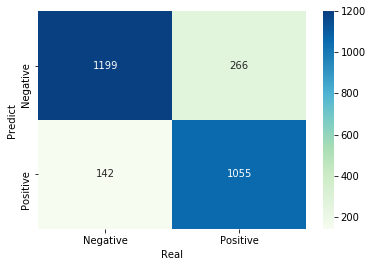

模型的准确率为：
 0.8467317806160781
模型的评估报告：
               precision    recall  f1-score   support

    Negative       0.82      0.89      0.85      1341
    Positive       0.88      0.80      0.84      1321

   micro avg       0.85      0.85      0.85      2662
   macro avg       0.85      0.85      0.85      2662
weighted avg       0.85      0.85      0.85      2662



In [36]:
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# 将数据集拆分为训练集和测试集
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,
                                                                 y,
                                                                 test_size = 0.25, 
                                                                 random_state=1)
# 构建伯努利贝叶斯分类器
bnb = naive_bayes.BernoulliNB()
# 模型在训练数据集上的拟合
bnb.fit(X_train,y_train)
# 模型在测试数据集上的预测
bnb_pred = bnb.predict(X_test)
# 构建混淆矩阵
cm = pd.crosstab(bnb_pred,y_test)
# 绘制混淆矩阵图
sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = 'd')
# 去除x轴和y轴标签
plt.xlabel('Real')
plt.ylabel('Predict')
# 显示图形
plt.show()

# 模型的预测准确率
print('模型的准确率为：\n',metrics.accuracy_score(y_test, bnb_pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, bnb_pred))

Text(0.5, 0.3, 'ROC curve (area = 0.92)')

Text(0.5, 0, '1-Specificity')

Text(0, 0.5, 'Sensitivity')

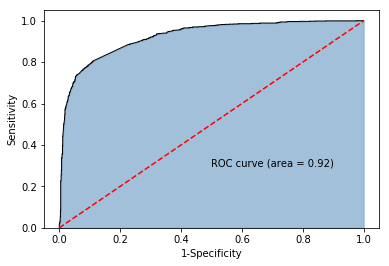

In [37]:
# 计算正例Positive所对应的概率，用于生成ROC曲线的数据
y_score = bnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test.map({'Negative':0,'Positive':1}), y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

训练数据集是关于词语在各文档中出现的频次，直接调用BernoulliNB是没有问题的，因为该类中参数binarize默认值为0，大于0的值在模型运算时，会被转为为1，否则转换为0.